# Statistics

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stat
import random as rd

## Summary Statistics

N: Total Population

n: Sample size

M: Successes in Population

x: Successes in Sample

### Central Tendencies

In [4]:
pokemon_df=pd.read_csv('./data/pokemon_data.csv')

#using Numpy/Scipy to calc central tendencies of population
print(np.mean(pokemon_df['HP'])) # mean
print(np.median(pokemon_df['HP'])) # median
print(stat.mode(pokemon_df['HP'])[0]) #mode, returns array

69.25875
65.0
[60]


### Variability

In [5]:
print(np.var(pokemon_df['HP'])) #Variance
print(np.std(pokemon_df['HP'] )) # Standard Deviation
print(stat.iqr(pokemon_df['HP'])) #IQR
print(stat.median_abs_deviation(pokemon_df['HP'])) #MAD
print(np.percentile(pokemon_df['HP'],75)) #percentile calc

651.2042984374999
25.518704873827353
30.0
15.0
80.0


### Correlation

In [6]:
# Linear relationship between two variables
# How much variability in y can be explained by x
# returns r value [0] and two taile p-value [1]

stat.pearsonr(pokemon_df['HP'],pokemon_df['Attack'])

(0.4223860287762231, 5.8889743583107866e-36)

<AxesSubplot:>

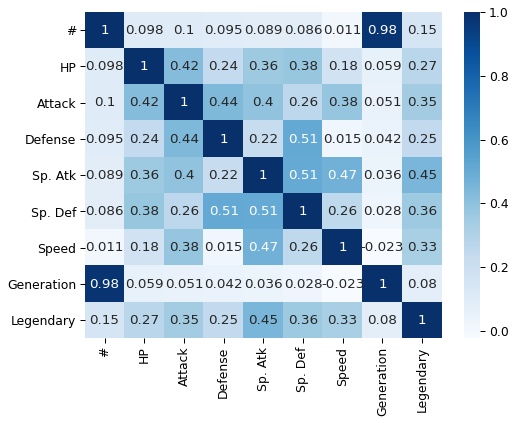

In [7]:
# Can use seaborn to make correlation matrices
plt.figure(figsize=(8,6))
sns.set_context('paper',font_scale=1.4)

# creating a correlation matrix
poke_mx=pokemon_df.corr()

# making it heat map
sns.heatmap(poke_mx, annot=True, cmap='Blues')

# Note HP and Attack have a value of 0.42 which calced above

## Data and Sampling Distributions

### Getting a sample

In [8]:
# random_state is just the seed
# generally best practice to always replace = True, can be ignored occassionally if sample is >10% of population
sample=pokemon_df.sample(n=50, random_state=1, replace = True)

### Boot Strapping

In [9]:
# Bootstrapping by hand, effectively created an infinite number of pseudo-samples from the original sample
# calcing the mean of HP 

# Bootstrapping 1,000 hypothetical samples 
sample_means=[]

for n in range(1000):
    iter_mean=[]
    for m in range(50):
        iter_sample=sample.sample(n=1, replace=True)
        iter_mean.append(iter_sample['HP'])
    
    sample_means.append(np.mean(iter_mean))


Sampling Interval Mean: 71.29361999999999
Sampling Interval Std. Dev.: 3.544451959838079


Text(0.5, 1.0, 'Sampling Distribution of Mean Pokemon HP and True Population Mean')

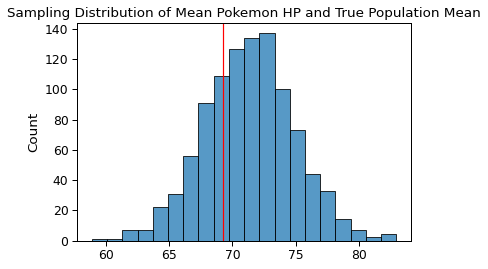

In [10]:
#plotting the hist of the mean HP of all 1,000 bootstrapped samples
true_mean=np.mean(pokemon_df['HP'])

print('Sampling Interval Mean: {}'.format(str(np.mean(sample_means))))
print('Sampling Interval Std. Dev.: {}'.format(str(np.std(sample_means))))
sns.histplot(sample_means, bins=20)
plt.axvline(true_mean, color='red')
plt.title('Sampling Distribution of Mean Pokemon HP and True Population Mean')

#Note that the true population mean is well within 3 standard deviations, this is relevant to confidence intervals 

### Confidence Intervals 

In [11]:
# Confidence intervals establish with what confidence have we captured a true populations statistic, given a sampling model
# This uses a student t distribtuion
# First parameter is confidence, second is degrees of freedom, third is sample mean, and last is standard error 

interval=stat.t.interval( 0.95, len(sample['HP'])-1, loc=np.mean(sample['HP']), scale=stat.sem(sample['HP']))

Sampling Interval Mean: 71.29361999999999
Sampling Interval Std. Dev.: 3.544451959838079



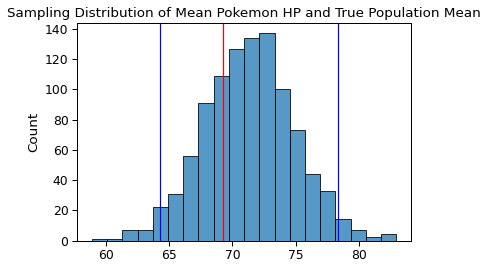

In [12]:
# plotting confidence interval over sampling distribution
true_mean=np.mean(pokemon_df['HP'])

print('Sampling Interval Mean: {}'.format(str(np.mean(sample_means))))
print('Sampling Interval Std. Dev.: {}'.format(str(np.std(sample_means))))
sns.histplot(sample_means, bins=20)
plt.axvline(true_mean, color='red') # True population mean
plt.axvline(interval[0], color='blue') #lower bound of interval
plt.axvline(interval[1], color='blue') #upper bound of interval
plt.title('Sampling Distribution of Mean Pokemon HP and True Population Mean')
print('')

# We've successfully captured the true population mean in this instance, 

### Normal Distribution

Text(0.5, 1.0, 'Normal Distribution')

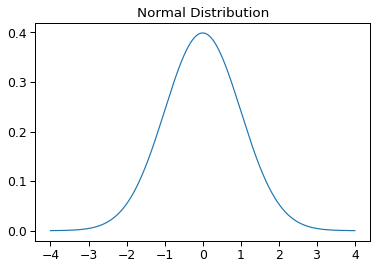

In [13]:
# Recall the central limit theorem, the larger the sample size, the closer the sampling distribution will approximate this
# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(-4, 4, 0.001)
# Mean = 0, SD = 1
plt.plot(x_axis, stat.norm.pdf(x_axis,0,1))
plt.title('Normal Distribution')

### Other Distributions

Text(0.5, 1.0, 'T Distribution')

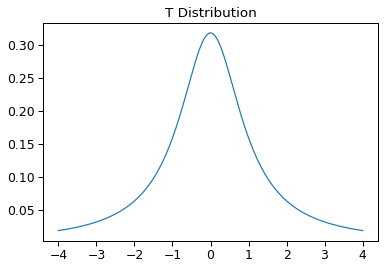

In [14]:
# Student-T Model
# has longer tails, more for smaller sample sizes

x_axis = np.arange(-4, 4, 0.001)
# Mean = 0, SD = 1
plt.plot(x_axis, stat.t.pdf(x_axis,1))
plt.title('T Distribution')

Text(0.5, 1.0, 'Binomial Distribution')

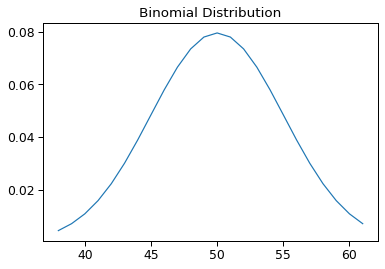

In [15]:
# Binomial Distribution
# Used to simulate a series of bernoulli trials (e.g. Yes/No Random events)
# n is the number of bernoulli trials and p is the probability of success for each trial 
x = np.arange(stat.binom.ppf(0.01, n=100, p=.5),
              stat.binom.ppf(0.99, n=100, p=.5))
# Mean = 0, SD = 1
plt.plot(x, stat.binom.pmf(x ,n=100,p=.5))
plt.title('Binomial Distribution')

## Statistical Experiments and Significance Testing

So you have a sample, and you can calulate some basic things about your sample. So, now what? Well now you can perform tests on you sample. Follow the below flowchart to determine what you should be doing. This section is dedicated to testing, but the next section is dedicated to regressions.

![Testing Flow Chart](img/test_flowchart.png)

### A/B Testing

Used to test the efficacy of some sort of a treatment, A or B. It starts by randomly allocating a sample in to two groups, on group who is given a treatment and the control. You then monitor the efficacy of the treatment group and compare it to the control group.

For this example, we'll assume we have some form of treatment that claims to have a chance of converting a normal Pokemon to a Legendary Pokemon. No Pokemon were harmed in this evaluation.


In [16]:
# Setting some base parameters
sample_size=100
alpha=.20
no_of_trials=5000

# treatment efficacy; in reality, you wouldn't know this, but this treatment has 7% chance of upgrading to a legendary
p=.10

# Generating a sample and apply treatment
population=pokemon_df[['Name','Legendary']]

control=population.sample(n=sample_size, replace=True, random_state=50)
treatment=population.sample(n=sample_size, replace=True, random_state=50)

for i, row in treatment.iterrows():
    if row[1]==False:
        treatment.at[i,'Legendary']=np.random.choice([True, False], p=[p, 1-p])

#Conversion rates
control_perc=np.sum(control['Legendary'])/sample_size
treatment_perc=np.sum(treatment['Legendary'])/sample_size


print('''Proportion of Legendary in control: {}
Proportion of Legendary in treatment: {}'''.format(control_perc, treatment_perc))


Proportion of Legendary in control: 0.13
Proportion of Legendary in treatment: 0.19


In [17]:
# Permutation Test
# Now that we have two samples, both control and treatement, we're going to 
# bootstrap a sampling distribution representing the differnce in the proportion of legendary Pokemon

bootstrap=[]
combined_samples=pd.concat([control, treatment], ignore_index=True)

for n in range(no_of_trials):
    iter_control=combined_samples.sample(n=sample_size, replace=True)
    iter_treatment=combined_samples.sample(n=sample_size, replace=True)
    
    perc_diff=(np.sum(iter_treatment['Legendary'])/sample_size)-(np.sum(iter_control['Legendary'])/sample_size)
    bootstrap.append(perc_diff)


P-value: 0.1412
Reject Null-Hypothesis; Treatment is effective.


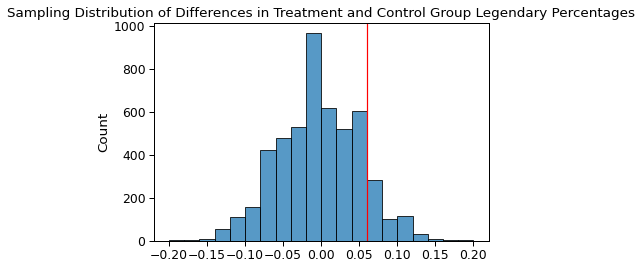

In [18]:
# Now let's plot the bootstrap to demonstrate how likely it was we saw the treatment proportion

sns.histplot(bootstrap, bins=20)
plt.axvline((treatment_perc-control_perc), color='red') # difference we observed in the treatment vs control
plt.title('Sampling Distribution of Differences in Treatment and Control Group Legendary Percentages')

# Since this is a permutation test, we can derive a p-value by looking at our bootstrap population
success_bootstrap=[x for x in bootstrap if x>=(treatment_perc-control_perc)]

p_value=len(success_bootstrap)/no_of_trials

print('P-value: {}'.format(p_value))
if p_value>alpha:
    print('Accept Null-Hypothesis; Treatment is ineffective.')
else:
    print('Reject Null-Hypothesis; Treatment is effective.')

### T-Tests

Of course, as this is Python, there are simpler ways to calculate the p-value. In this case, we'll use a T-test to recalculate the difference between groups A and B above, the treatment and control.

In [19]:
test=stat.ttest_ind(control['Legendary'],treatment['Legendary'])

t_test_p_value=test[1]

print('T-Test P-Value of our Samples: {}'.format(t_test_p_value))

# With that p-value from the t-test, it is pretty close to our p-value from the permuation test

T-Test P-Value of our Samples: 0.249339835590857


### ANOVA

In [20]:
# Allows for testing multiple treatments. Note, here are the assumptions necessary
#    The samples are independent.
#    Each sample is from a normally distributed population.
#    The population standard deviations of the groups are all equal. This property is known as homoscedasticity.

# efficacy of treatment 2
p_2=.05

treatment_2=population.sample(n=sample_size, replace=True, random_state=50)

for i, row in treatment_2.iterrows():
    if row[1]==False:
        treatment_2.at[i,'Legendary']=np.random.choice([True, False], p=[p_2, 1-p_2])
        
anova=stat.f_oneway(control['Legendary'], treatment['Legendary'], treatment_2['Legendary'])
print(anova)

#The P-Value here represents the probability of null hypothesis (all samples have the same proportion) being true

F_onewayResult(statistic=0.7402315484804632, pvalue=0.4778813822647716)


### Chi Square Tests

## Regression and Prediction 

### Simple Linear Regression

### Multiple Linear Regression

### Logistic Regression